In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


In [36]:
# Reading the csv file and nameing the DataFrame.

df = pd.read_csv('weather-sa-2017-2019-clean.csv')

In [37]:
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [38]:
print(df.columns)

Index(['Unnamed: 0', 'city', 'date', 'time', 'year', 'month', 'day', 'hour',
       'minute', 'weather', 'temp', 'wind', 'humidity', 'barometer',
       'visibility'],
      dtype='object')


In [39]:
# Explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


# Cleaning and Data Preprocessing

In [40]:
# Checking for duplicated rows

print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


In [41]:

# Convert humidity from percentage string to numeric
df["humidity"] = df["humidity"].str.replace("%", "").astype(float)

# Encode categorical weather conditions
weather_encoder = {w: i for i, w in enumerate(df["weather"].unique())}
df["weather"] = df["weather"].map(weather_encoder)

# Display first 5 rows
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,0,17,11,64.0,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,0,17,6,64.0,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,0,15,11,72.0,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,0,15,11,72.0,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,0,15,9,72.0,1019.0,16


# Feature Selection

In [42]:
# Define feature columns (excluding target columns)
feature_cols = ["year", "month", "day", "hour", "minute", "wind", "humidity", "barometer", "visibility"]

# Regression (Temperature Prediction)
X_temp = df[feature_cols]
y_temp = df["temp"]

# Classification (Weather Condition)
X_weather = df[feature_cols]
y_weather = df["weather"]

# Train-Test Split

In [43]:
# Split for temperature prediction
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Split for weather classification
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

In [44]:
import numpy as np

print("Missing values in X_train_temp:", np.isnan(X_train_temp).sum())
print("Missing values in y_train_temp:", np.isnan(y_train_temp).sum())

Missing values in X_train_temp: year           0
month          0
day            0
hour           0
minute         0
wind           0
humidity      13
barometer     59
visibility     0
dtype: int64
Missing values in y_train_temp: 0


In [45]:
from sklearn.impute import SimpleImputer

# Create an imputer (mean strategy)
imputer = SimpleImputer(strategy="mean")  # Change to "median" if needed

# Fit on training data and transform both training & test data
X_train_temp = imputer.fit_transform(X_train_temp)
X_test_temp = imputer.transform(X_test_temp)  # Apply the same transformation to test data

In [46]:
import numpy as np

print("Missing values in X_train_weather:", np.isnan(X_train_weather).sum())
print("Missing values in x_test_weather:", np.isnan(X_test_weather).sum())

Missing values in X_train_weather: year           0
month          0
day            0
hour           0
minute         0
wind           0
humidity      13
barometer     59
visibility     0
dtype: int64
Missing values in x_test_weather: year           0
month          0
day            0
hour           0
minute         0
wind           0
humidity       4
barometer     13
visibility     0
dtype: int64


In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'
X_train_weather = imputer.fit_transform(X_train_weather)
X_test_weather = imputer.transform(X_test_weather)

# Train Models

Temperature Prediction (Regression)

In [48]:
# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

lr_model.fit(X_train_temp, y_train_temp)
rf_model.fit(X_train_temp, y_train_temp)
knn_model.fit(X_train_temp, y_train_temp)

# Make predictions
y_pred_lr = lr_model.predict(X_test_temp)
y_pred_rf = rf_model.predict(X_test_temp)
y_pred_knn = knn_model.predict(X_test_temp)

# Evaluate
print("Linear Regression MAE:", mean_absolute_error(y_test_temp, y_pred_lr))
print("Random Forest MAE:", mean_absolute_error(y_test_temp, y_pred_rf))
print("KNN Regressor MAE:", mean_absolute_error(y_test_temp, y_pred_knn))

Linear Regression MAE: 3.884479859405637
Random Forest MAE: 1.1647639781656396
KNN Regressor MAE: 2.147447043469531


# Visualizing Regression Predictions

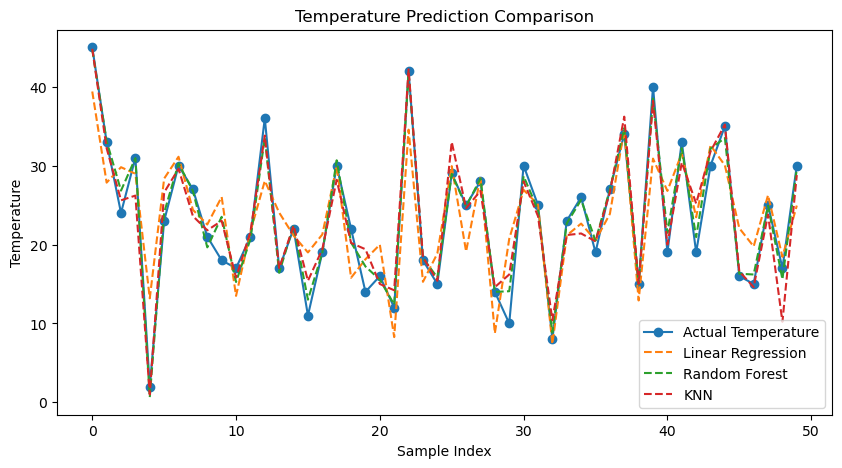

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_temp.values[:50], label="Actual Temperature", marker='o')
plt.plot(y_pred_lr[:50], label="Linear Regression", linestyle="dashed")
plt.plot(y_pred_rf[:50], label="Random Forest", linestyle="dashed")
plt.plot(y_pred_knn[:50], label="KNN", linestyle="dashed")

plt.xlabel("Sample Index")
plt.ylabel("Temperature")
plt.title("Temperature Prediction Comparison")
plt.legend()
plt.show()

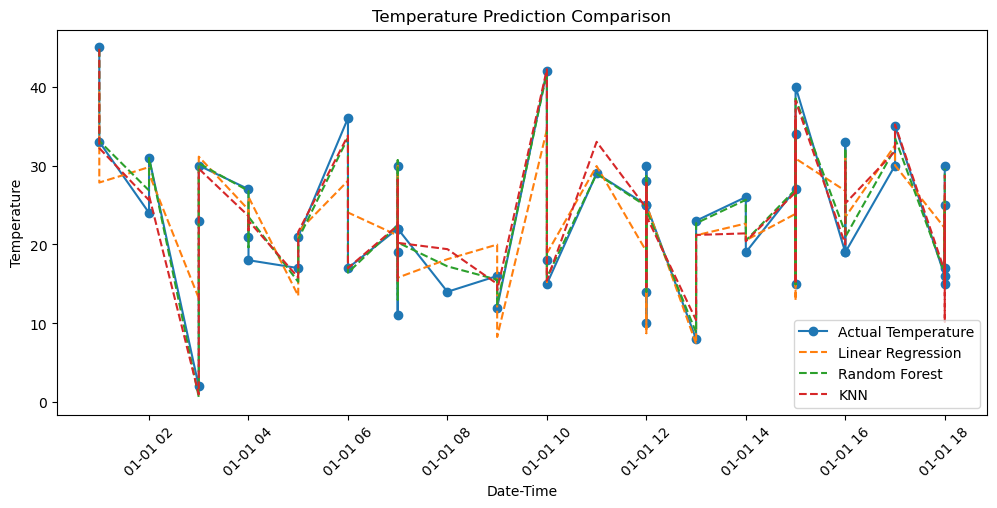

In [50]:
# Create a datetime index for y_test_temp
X_test_temp_df = pd.DataFrame(X_test_temp, columns=['year', 'month', 'day', 'hour', 'minute', 'wind', 'humidity', 'barometer', 'visibility'])

X_test_temp_df['datetime'] = pd.to_datetime(
    X_test_temp_df[['year', 'month', 'day', 'hour', 'minute']]
)

# Sort by datetime (if not already sorted)
X_test_temp_df = X_test_temp_df.sort_values(by="datetime")

# Plot with datetime on x-axis
plt.figure(figsize=(12, 5))
plt.plot(X_test_temp_df['datetime'][:50], y_test_temp.values[:50], label="Actual Temperature", marker='o')
plt.plot(X_test_temp_df['datetime'][:50], y_pred_lr[:50], label="Linear Regression", linestyle="dashed")
plt.plot(X_test_temp_df['datetime'][:50], y_pred_rf[:50], label="Random Forest", linestyle="dashed")
plt.plot(X_test_temp_df['datetime'][:50], y_pred_knn[:50], label="KNN", linestyle="dashed")

plt.xlabel("Date-Time")
plt.ylabel("Temperature")
plt.title("Temperature Prediction Comparison")
plt.legend()
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

# Weather Condition Classification

In [51]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

# Train models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression()

rf_clf.fit(X_train_weather, y_train_weather)
knn_clf.fit(X_train_weather, y_train_weather)
log_reg.fit(X_train_weather, y_train_weather)

# Predictions
y_pred_rf_clf = rf_clf.predict(X_test_weather)
y_pred_knn_clf = knn_clf.predict(X_test_weather)
y_pred_log_reg = log_reg.predict(X_test_weather)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test_weather, y_pred_rf_clf))
print("Random Forest F1 Score:", f1_score(y_test_weather, y_pred_rf_clf, average="weighted"))

print("KNN Accuracy:", accuracy_score(y_test_weather, y_pred_knn_clf))
print("KNN F1 Score:", f1_score(y_test_weather, y_pred_knn_clf, average="weighted"))

print("Logistic Regression Accuracy:", accuracy_score(y_test_weather, y_pred_log_reg))
print("Logistic Regression F1 Score:", f1_score(y_test_weather, y_pred_log_reg, average="weighted"))


Random Forest Accuracy: 0.9257905832747716
Random Forest F1 Score: 0.9208408277235681
KNN Accuracy: 0.8348358598534283
KNN F1 Score: 0.8280569873336285
Logistic Regression Accuracy: 0.4603152293946391
Logistic Regression F1 Score: 0.4025027190964774


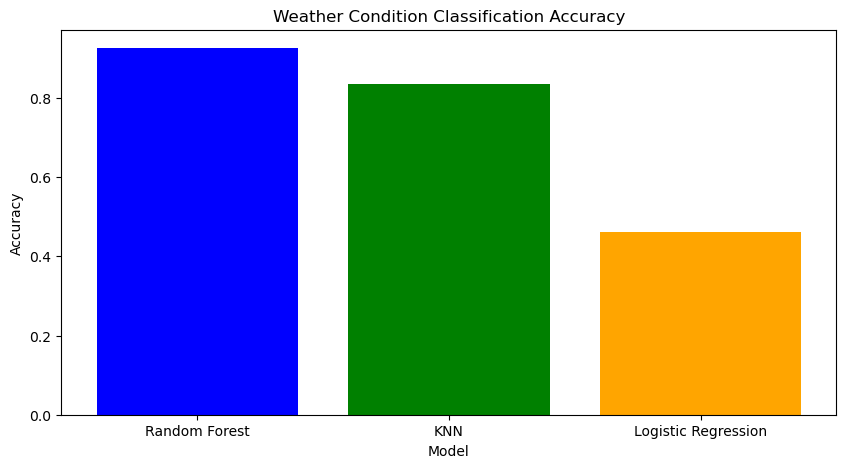

In [52]:
# Plot the accuracies of Random Forest, KNN, and Logistic Regression
plt.figure(figsize=(10, 5))
plt.bar(["Random Forest", "KNN", "Logistic Regression"],
        [accuracy_score(y_test_weather, y_pred_rf_clf), 
         accuracy_score(y_test_weather, y_pred_knn_clf), 
         accuracy_score(y_test_weather, y_pred_log_reg)], 
        color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Weather Condition Classification Accuracy")
plt.show()

# Anomaly Detection (Using Isolation Forest)

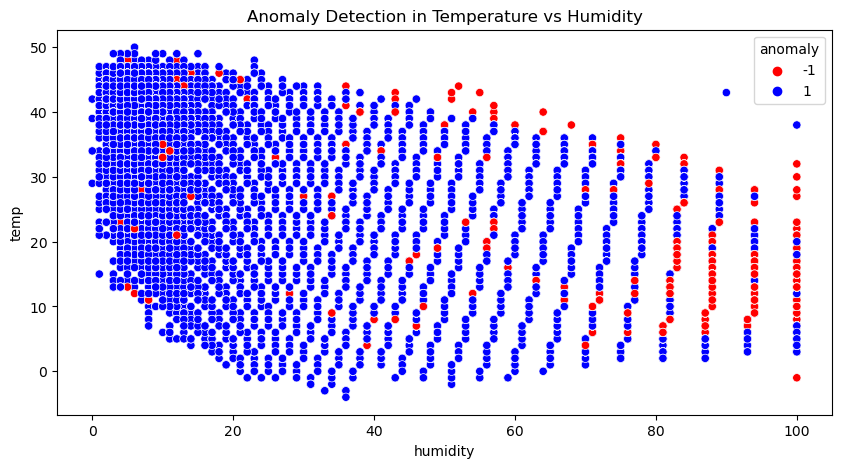

In [53]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_temp_imputed = imputer.fit_transform(X_temp)

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso_forest.fit_predict(X_temp_imputed)

# Visualize anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="humidity", y="temp", hue=df["anomaly"], palette={1: 'blue', -1: 'red'})
plt.title("Anomaly Detection in Temperature vs Humidity")
plt.show()

# Feature Importance Analysis (Using Random Forest)

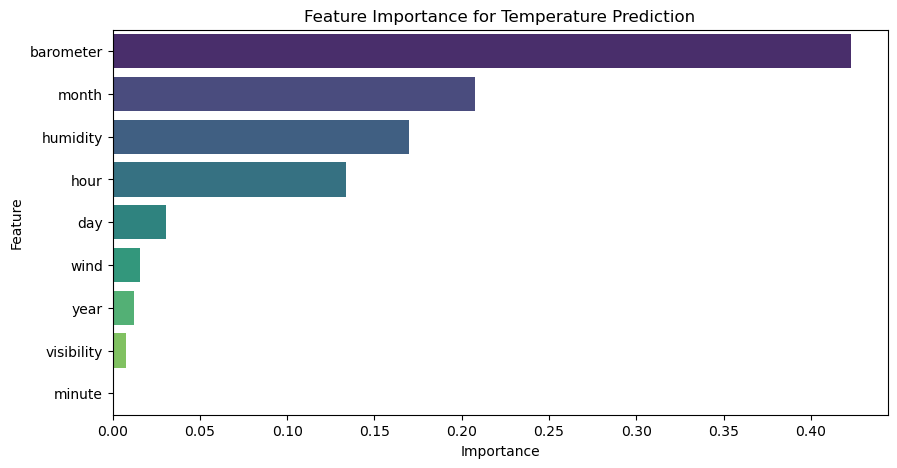

In [54]:
# Get feature importance from Random Forest Regressor
importance_values = rf_model.feature_importances_

# Create a DataFrame
feature_importance = pd.DataFrame({"Feature": feature_cols, "Importance": importance_values}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance for Temperature Prediction")
plt.show()

# Prediction for the next year 2020

In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Load dataset (replace with your real source)
# df = pd.read_csv("your_weather_data.csv")

# --- Data Preprocessing ---
df["humidity"].fillna(df["humidity"].mean(), inplace=True)
df["barometer"].fillna(df["barometer"].mean(), inplace=True)
df["visibility"].replace(-1, np.nan, inplace=True)
df["visibility"].fillna(df["visibility"].median(), inplace=True)

# Encode weather column
weather_encoder = LabelEncoder()
df["weather_encoded"] = weather_encoder.fit_transform(df["weather"])

# Features and targets
features = ["year", "month", "day", "hour", "wind", "humidity", "barometer", "visibility"]
targets = ["temp", "wind", "humidity", "weather_encoded"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"{name} MAE:", mean_absolute_error(y_test, y_pred))

# --- Generate Predictions by Year and City ---
def generate_predictions(year, city_name):
    dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq="H")
    df_year = pd.DataFrame({
        "year": dates.year,
        "month": dates.month,
        "day": dates.day,
        "hour": dates.hour
    })

    # Use city's mean data from original df
    df_city = df[df["city"] == city_name]

    df_year["wind"] = df_city["wind"].mean()
    df_year["humidity"] = df_city["humidity"].mean()
    df_year["barometer"] = df_city["barometer"].mean()
    df_year["visibility"] = df_city["visibility"].median()

    preds = models["Random Forest"].predict(df_year[features])
    df_year["temp"] = preds[:, 0]
    df_year["wind_speed"] = preds[:, 1]
    df_year["humidity"] = preds[:, 2]
    df_year["weather"] = preds[:, 3]
    df_year["city"] = city_name

    return df_year

# Cities to analyze
cities = df["city"].unique()
city_data_2020 = {}

for city in cities:
    city_data_2020[city] = generate_predictions(2020, city)

Linear Regression MAE: 1.4617004596990746
Random Forest MAE: 0.8266512782998097
KNN Regressor MAE: 1.1719611581631937


# Visualizing the predicted data for 2020 (Wind Speed, Temperature, Humidity)

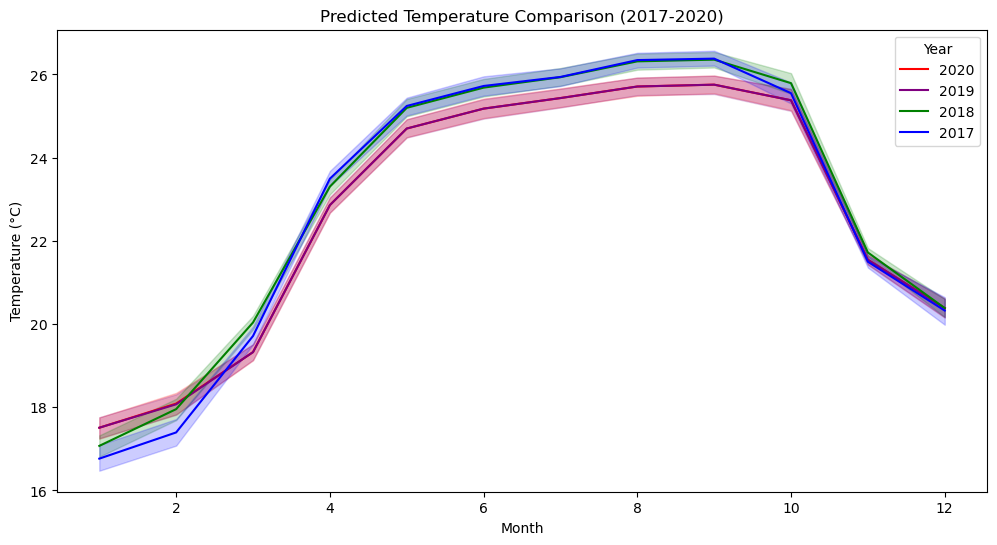

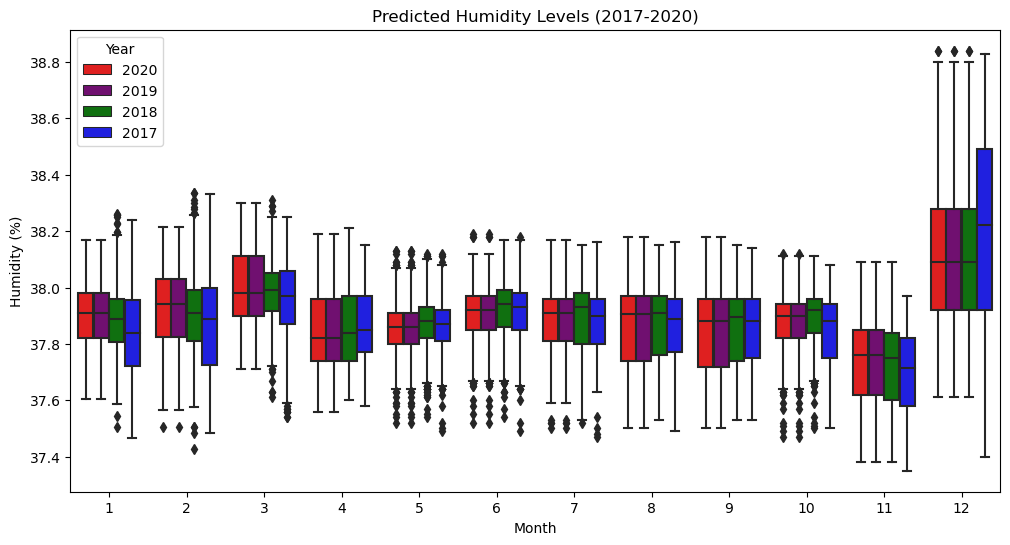

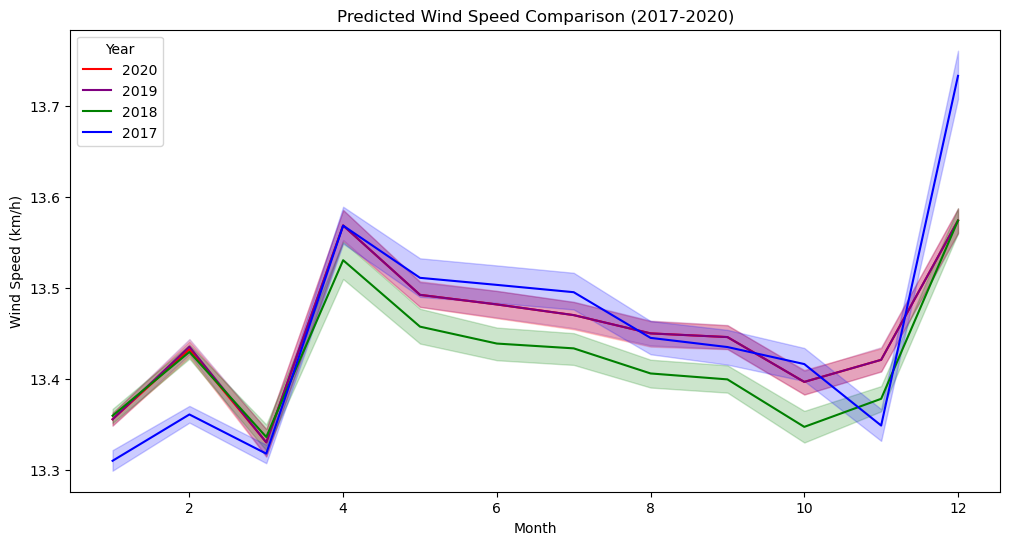

In [73]:
# Plot temperature comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="temp", hue="year", data=df_all, palette=["r", "purple", "g", "b"])
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Predicted Temperature Comparison (2017-2020)")
plt.legend(title="Year")
plt.show()

# Plot humidity comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="humidity", hue="year", data=df_all, palette=["r", "purple", "g", "b"])
plt.title("Predicted Humidity Levels (2017-2020)")
plt.xlabel("Month")
plt.ylabel("Humidity (%)")
plt.legend(title="Year")
plt.show()

# Plot wind speed comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="wind_speed", hue="year", data=df_all, palette=["r", "purple", "g", "b"])
plt.xlabel("Month")
plt.ylabel("Wind Speed (km/h)")
plt.title("Predicted Wind Speed Comparison (2017-2020)")
plt.legend(title="Year")
plt.show()

# Visualising for the next year 2020 City Wise


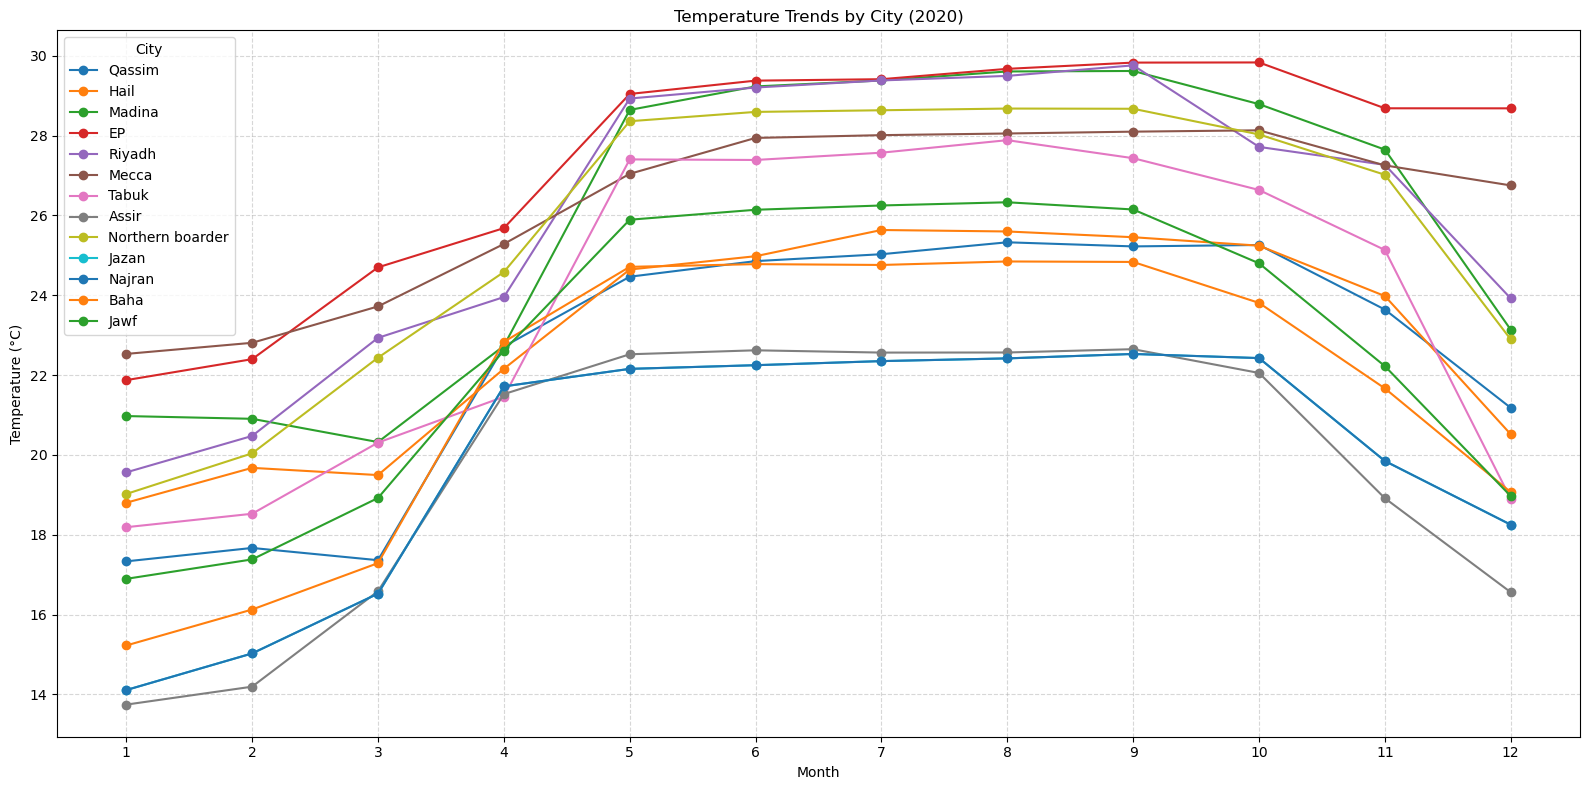

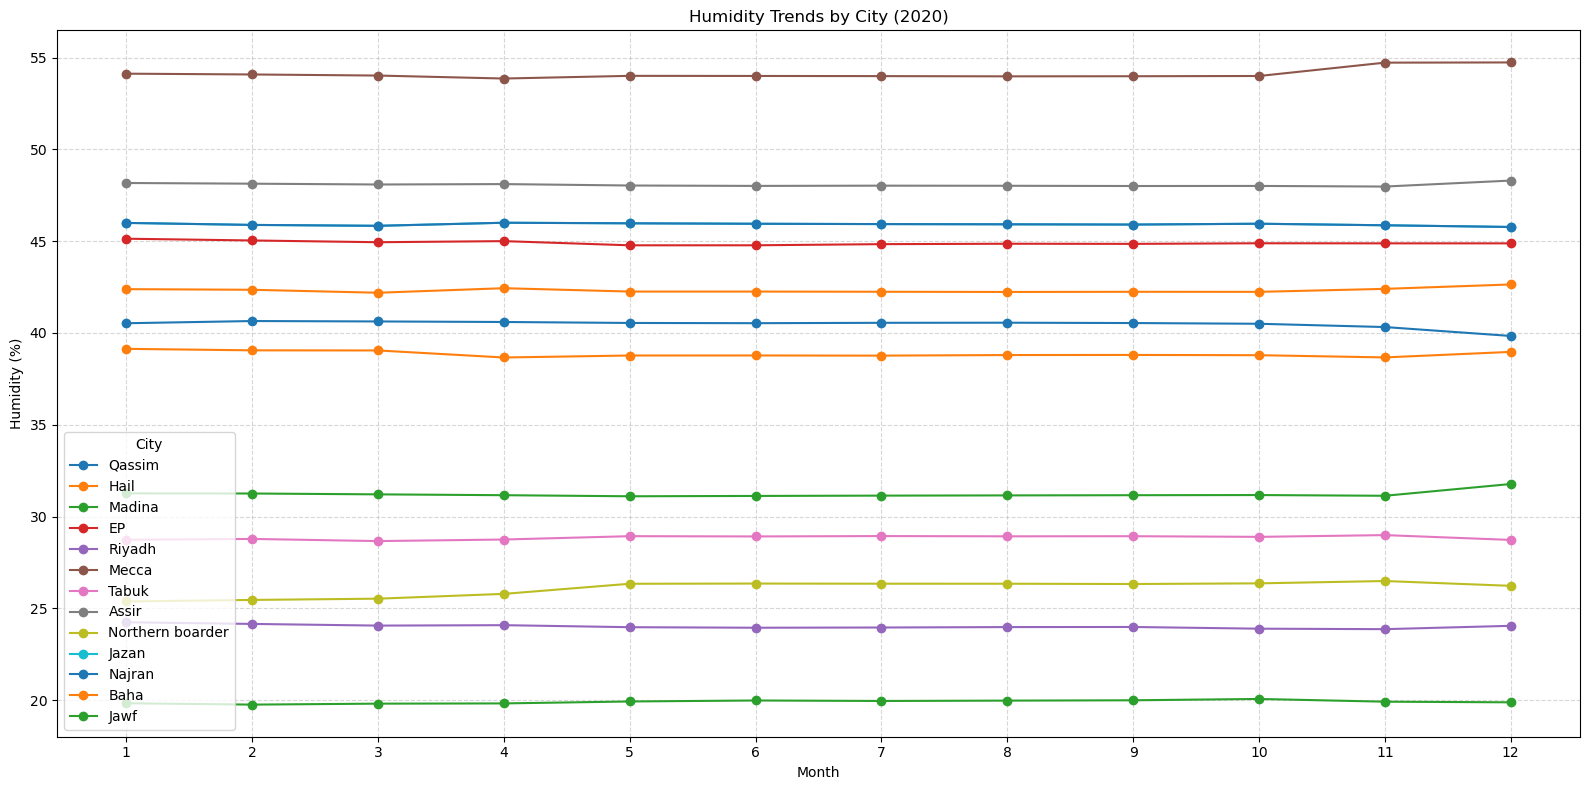

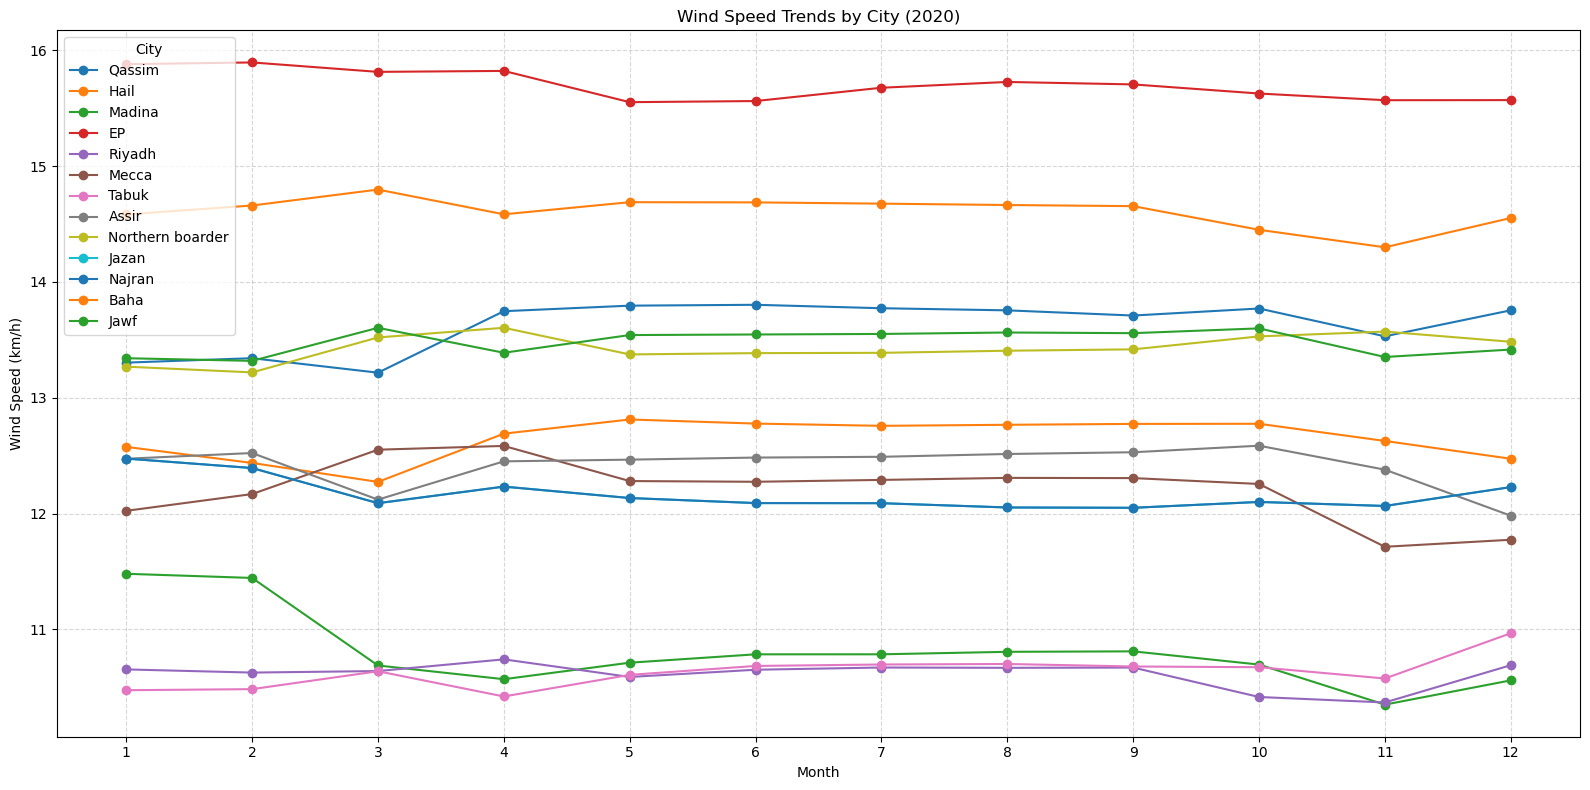

In [74]:
# Plotting detailed charts
for param, label, unit in zip(["temp", "humidity", "wind_speed"], 
                              ["Temperature", "Humidity", "Wind Speed"], 
                              ["°C", "%", "km/h"]):
    plt.figure(figsize=(16, 8))
    for city, df_city in city_data_2020.items():
        monthly_avg = df_city.groupby("month")[param].mean()
        plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label=city)

    plt.title(f"{label} Trends by City (2020)")
    plt.xlabel("Month")
    plt.ylabel(f"{label} ({unit})")
    plt.xticks(range(1, 13))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title="City")
    plt.tight_layout()
    plt.show()

Exporting the predicted data of 2020 to a CSV File.

In [68]:
df_all.to_csv("weather_predictions_2017_2020.csv", index=False)

In [75]:
# 1. Save city-wise weather data for 2020
weather_2020 = []
for city, df_city in city_data_2020.items():
    df_city = df_city.copy()
    df_city["City"] = city
    weather_2020.append(df_city)
weather_2020_df = pd.concat(weather_2020)
weather_2020_df.to_csv("weather_2020_city.csv", index=False)

# 2. Save prediction results
results_df = pd.DataFrame({
    "datetime": X_test_temp_df["datetime"][:50].values,
    "Actual_Temp": y_test_temp.values[:50],
    "Linear_Regression": y_pred_lr[:50],
    "Random_Forest": y_pred_rf[:50],
    "KNN": y_pred_knn[:50]
})
results_df.to_csv("prediction_results.csv", index=False)

# 3. Save feature importance
feature_importance.to_csv("feature_importance.csv", index=False)

# 4. Save anomaly detection results
df[["humidity", "temp", "anomaly"]].to_csv("anomaly_detection.csv", index=False)

In [76]:

import pandas as pd

combined_df = pd.concat([df_2017, df_2018, df_2019, df_2020], ignore_index=True)

# Save to CSV
combined_df.to_csv("weather_combined_2017_2020.csv", index=False)

print("Saved weather_combined_2017_2020.csv")

✅ Saved weather_combined_2017_2020.csv
